In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [12]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20jose
Processing Record 2 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaini
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ushuaia
Processing Record 4 of Set 1 | kencong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kencong
Processing Record 5 of Set 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=khatanga
City not found. Skipping...
Processing Record 6 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chokurdakh
Proc

Processing Record 3 of Set 2 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=namibe
Processing Record 4 of Set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint%20george
Processing Record 5 of Set 2 | lazurne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lazurne
Processing Record 6 of Set 2 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mataura
Processing Record 7 of Set 2 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=camacha
Processing Record 8 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cape%20town
Processing Record 9 of Set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/wea

Processing Record 5 of Set 3 | vanderhoof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vanderhoof
Processing Record 6 of Set 3 | baoding
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=baoding
Processing Record 7 of Set 3 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=brae
Processing Record 8 of Set 3 | mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mackay
Processing Record 9 of Set 3 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=salalah
Processing Record 10 of Set 3 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=taoudenni
Processing Record 11 of Set 3 | san patricio
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 8 of Set 4 | progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=progreso
Processing Record 9 of Set 4 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=victoria
Processing Record 10 of Set 4 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=guerrero%20negro
Processing Record 11 of Set 4 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=deputatskiy
Processing Record 12 of Set 4 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=belaya%20gora
Processing Record 13 of Set 4 | nacala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nacala
Processing Record 14 of Set 4 | a
http://api.openweathermap.

Processing Record 11 of Set 5 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=butaritari
Processing Record 12 of Set 5 | manoel urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=manoel%20urbano
Processing Record 13 of Set 5 | maiduguri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=maiduguri
Processing Record 14 of Set 5 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aklavik
Processing Record 15 of Set 5 | taber
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=taber
Processing Record 16 of Set 5 | karpogory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=karpogory
Processing Record 17 of Set 5 | saskylakh
http://api.openweathermap.or

City not found. Skipping...
Processing Record 15 of Set 6 | sembe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sembe
City not found. Skipping...
Processing Record 16 of Set 6 | dongying
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dongying
Processing Record 17 of Set 6 | locri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=locri
Processing Record 18 of Set 6 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yeppoon
Processing Record 19 of Set 6 | banjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=banjar
Processing Record 20 of Set 6 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=coahuayana
Processing Record 21 of Set 6 | akyab
ht

Processing Record 17 of Set 7 | lichinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lichinga
Processing Record 18 of Set 7 | statesboro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=statesboro
Processing Record 19 of Set 7 | kichera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kichera
Processing Record 20 of Set 7 | balkhash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=balkhash
Processing Record 21 of Set 7 | slavgorodskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=slavgorodskoye
City not found. Skipping...
Processing Record 22 of Set 7 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vila%20velha
Processing Record 23 of Set 7 | ri

Processing Record 19 of Set 8 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fortuna
Processing Record 20 of Set 8 | yekaterinoslavka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yekaterinoslavka
Processing Record 21 of Set 8 | mangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mangan
Processing Record 22 of Set 8 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rocha
Processing Record 23 of Set 8 | georgiyevskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=georgiyevskoye
Processing Record 24 of Set 8 | ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ambulu
Processing Record 25 of Set 8 | chifeng
http://api.openweathermap.org/

Processing Record 23 of Set 9 | robertsganj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=robertsganj
Processing Record 24 of Set 9 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=iqaluit
Processing Record 25 of Set 9 | mount pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mount%20pleasant
Processing Record 26 of Set 9 | tasbuget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tasbuget
City not found. Skipping...
Processing Record 27 of Set 9 | kandy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kandy
Processing Record 28 of Set 9 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kavieng
Processing Record 29 of Set 9 | yanji
http:/

Processing Record 25 of Set 10 | ust-kamchatsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ust-kamchatsk
City not found. Skipping...
Processing Record 26 of Set 10 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=praia%20da%20vitoria
Processing Record 27 of Set 10 | hall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hall
Processing Record 28 of Set 10 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yar-sale
Processing Record 29 of Set 10 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 10 | falmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q

Processing Record 28 of Set 11 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=portland
Processing Record 29 of Set 11 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=solnechnyy
Processing Record 30 of Set 11 | mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mahon
Processing Record 31 of Set 11 | atagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=atagay
Processing Record 32 of Set 11 | najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=najran
Processing Record 33 of Set 11 | khorixas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=khorixas
Processing Record 34 of Set 11 | alotau
http://api.openweathermap.org/data/2.5/weather

City not found. Skipping...
Processing Record 32 of Set 12 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sisimiut
Processing Record 33 of Set 12 | tricase
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tricase
Processing Record 34 of Set 12 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tura
Processing Record 35 of Set 12 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tumannyy
City not found. Skipping...
Processing Record 36 of Set 12 | schruns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=schruns
Processing Record 37 of Set 12 | smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=smithers
Processing Record 38 of Set 12 |

In [14]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Show Record Count
city_data_pd.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [15]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san jose,92,PH,1537034926,99,15.79,120.99,72.69,4.85
1,vaini,32,IN,1537034384,95,15.34,74.49,70.17,3.40
2,ushuaia,40,AR,1537030800,86,-54.81,-68.31,39.20,23.04
3,kencong,8,ID,1537035004,89,-7.78,112.24,63.33,4.41
4,chokurdakh,100,RU,1537034490,98,70.62,147.90,37.05,15.37


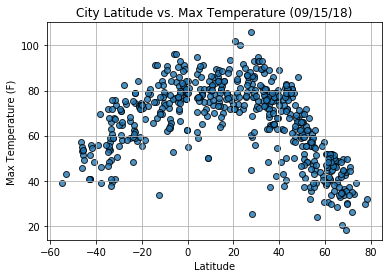

In [19]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/bott00a/Desktop/Washu/Fig1.png")

# Show plot
plt.show()

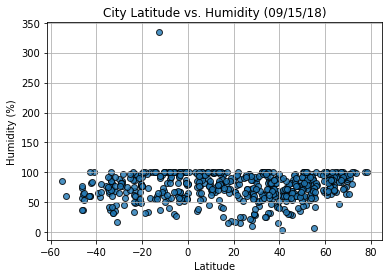

In [20]:

# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/bott00a/Desktop/Washu/Fig2.png")

# Show plot
plt.show()

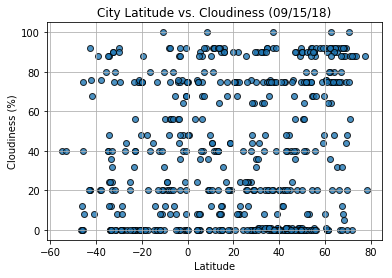

In [21]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/bott00a/Desktop/Washu/Fig3.png")

# Show plot
plt.show()

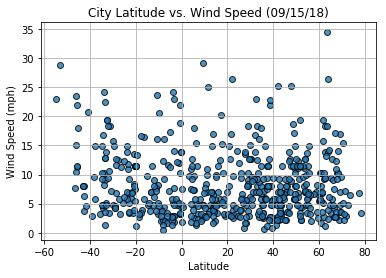

In [22]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/bott00a/Desktop/Washu/Fig4.png")

# Show plot
plt.show()